In [50]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import noisereduce as nr
import librosa.display
import IPython.display as ipd
import pandas as pd

import AnimalDetect as ad

FRAME_SIZE = 2048
HOP_LENGTH = 128
sr = 22050

In [51]:
# Path to the directory containing audio files
audio_dir = 'audio'

# Path to the metadata CSV file
metadata_file = 'meta/esc50.csv'

# List of animal labels to include
animal_labels = ['dog', 'cat', 'rooster', 'hen', 'pig', 'frog', 'cow', 'crow']

# Load metadata into a Pandas dataframe
metadata = pd.read_csv(metadata_file)

# Filter metadata to include only audio files labeled as one of the animal labels
animal_metadata = metadata[metadata['category'].isin(animal_labels)]

# Get list of audio filenames for filtered metadata
filename = animal_metadata['filename'].tolist()

# Create a new dataframe to store the paths and labels
animal_files = pd.DataFrame({'animal': animal_metadata['category'], 'file': filename})

animal_files.reset_index(drop=True, inplace=True)

animal_files.head()

,animal,file
0,dog,1-100032-A-0.wav
1,crow,1-103298-A-9.wav
2,dog,1-110389-A-0.wav
3,frog,1-15689-A-4.wav
4,frog,1-15689-B-4.wav


In [52]:
# Create a new dataframe containing cow audio files
cow_files = animal_files[animal_files['animal'] == 'dog']

In [53]:
cow_files.iloc[17]

animal                 dog
file      3-144028-A-0.wav
Name: 146, dtype: object

<Figure size 1500x500 with 0 Axes>

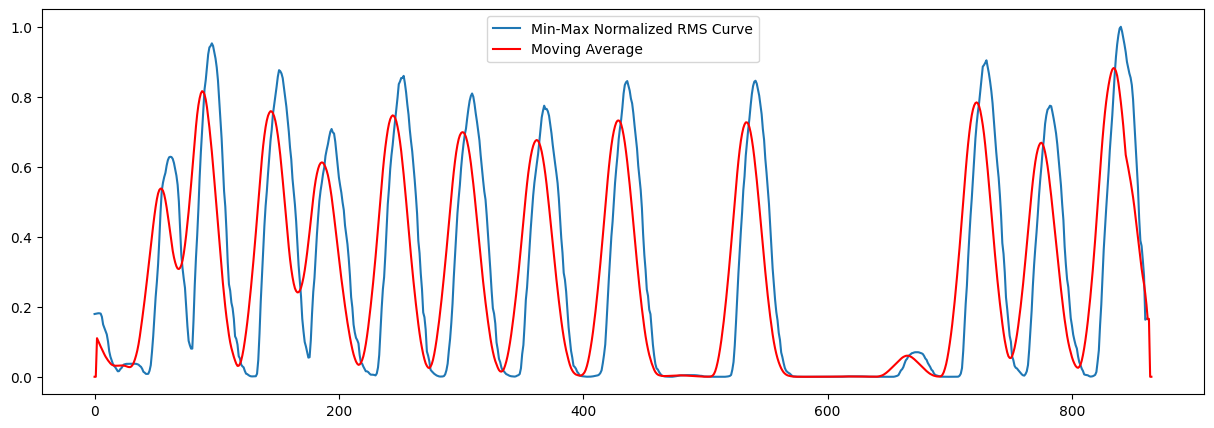

Length of RMS curve:  862


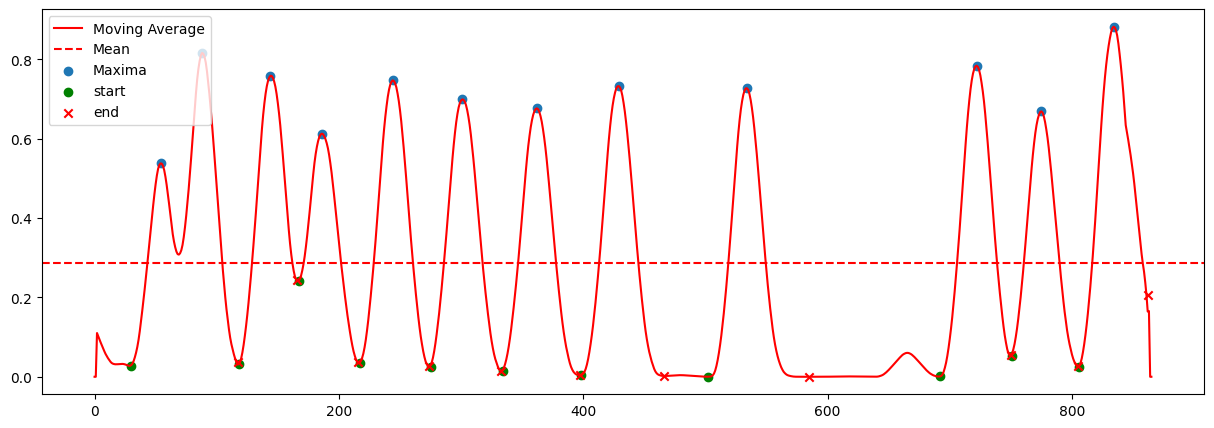

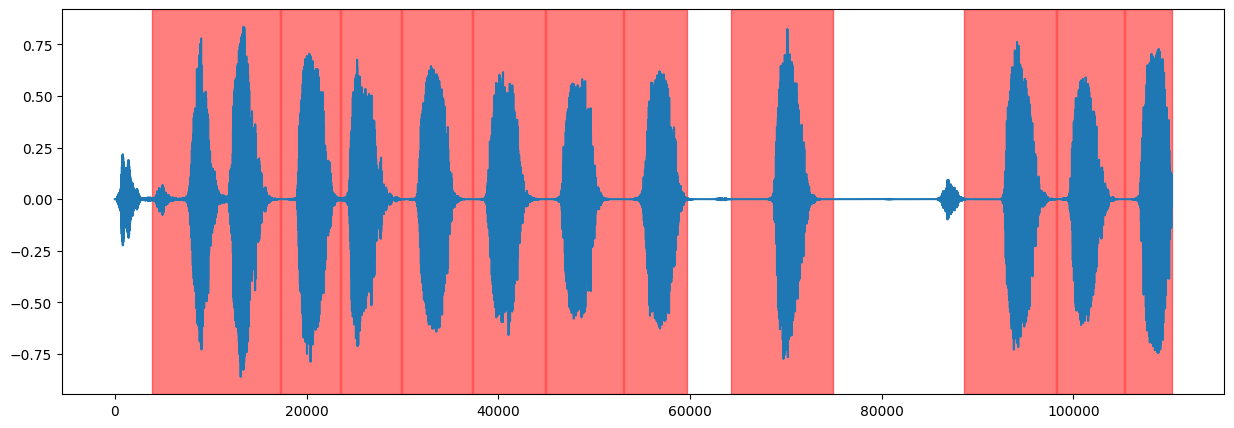

Start Sample Point:  [3840, 17309, 23581, 29981, 37405, 44957, 53149, 64256, 88576, 98333, 105373]
End Sample Point:  [17181, 23453, 29853, 37277, 44829, 53021, 59648, 74880, 98205, 105245, 110250]


In [54]:
x, sr = librosa.load(audio_dir + cow_files.iloc[17]["file"])
reduced_noise = nr.reduce_noise(y=x, sr=sr)

start_time, end_time, clips = ad.onset_detection(reduced_noise, False, True)

#Second Cut

In [55]:
clips = ad.remove_clips(clips)

In [56]:
for i in range(len(clips)):
    clips[i] = ad.second_cliping(clips[i])

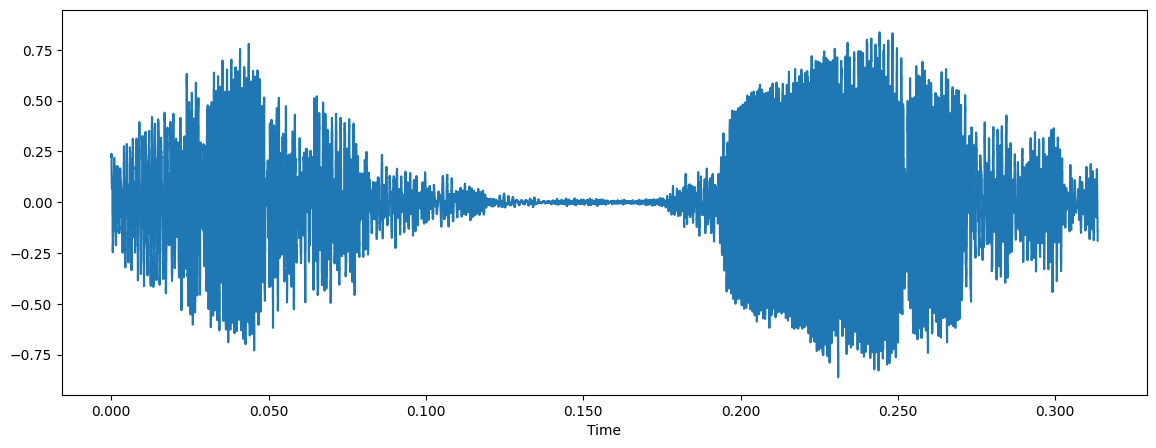

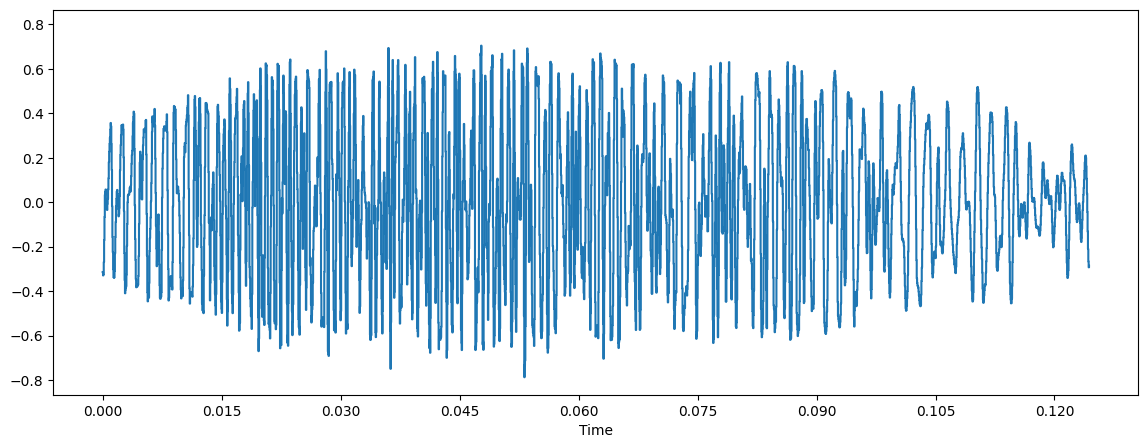

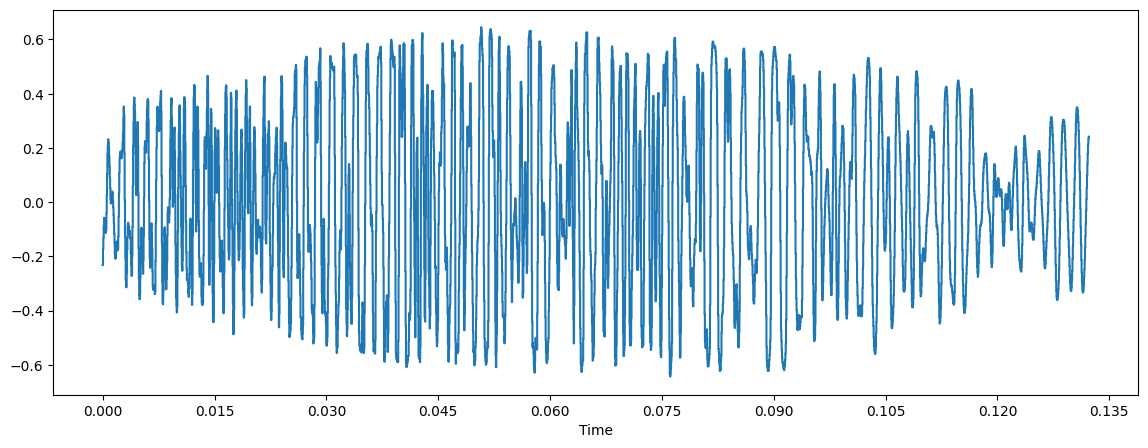

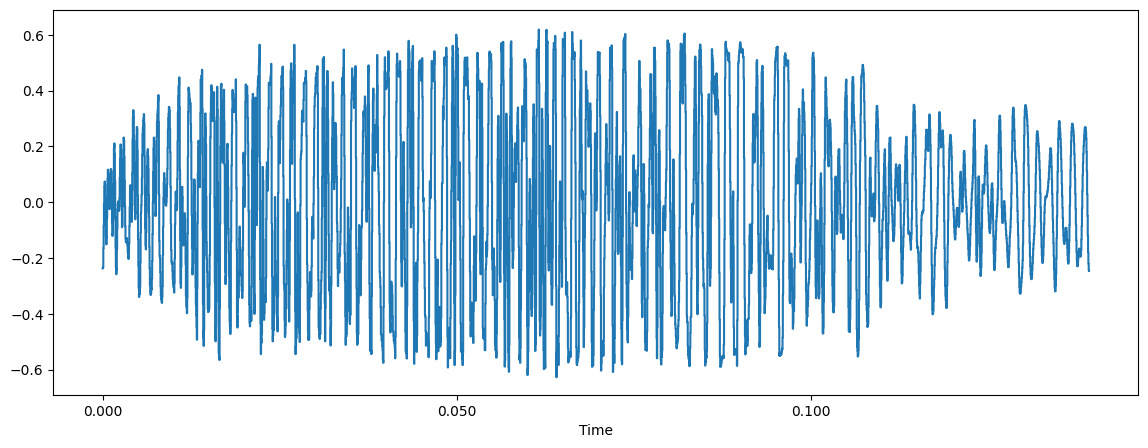

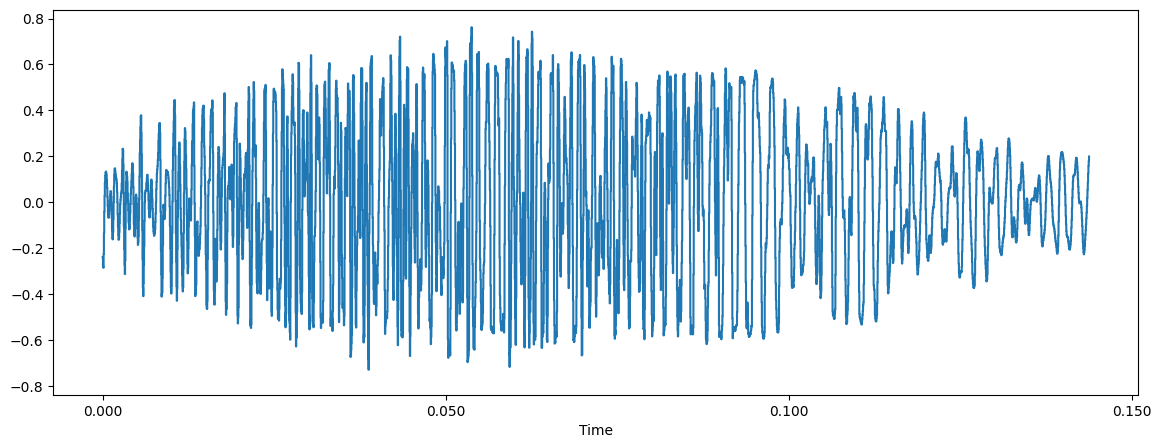

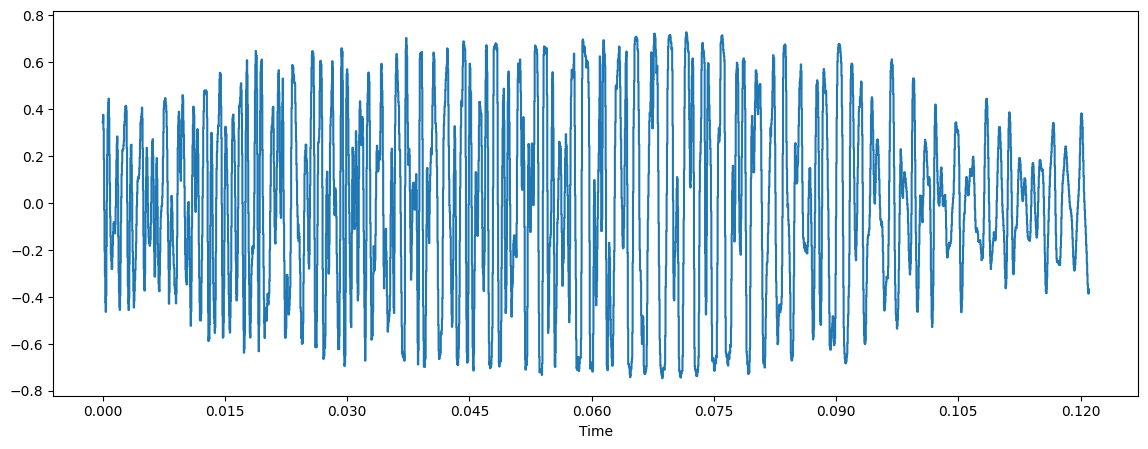

In [57]:
# plot each clip
for i in range(len(clips)):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(clips[i], sr=sr)
    plt.show()